In [67]:
!pip install xgboost lightgbm catboost

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

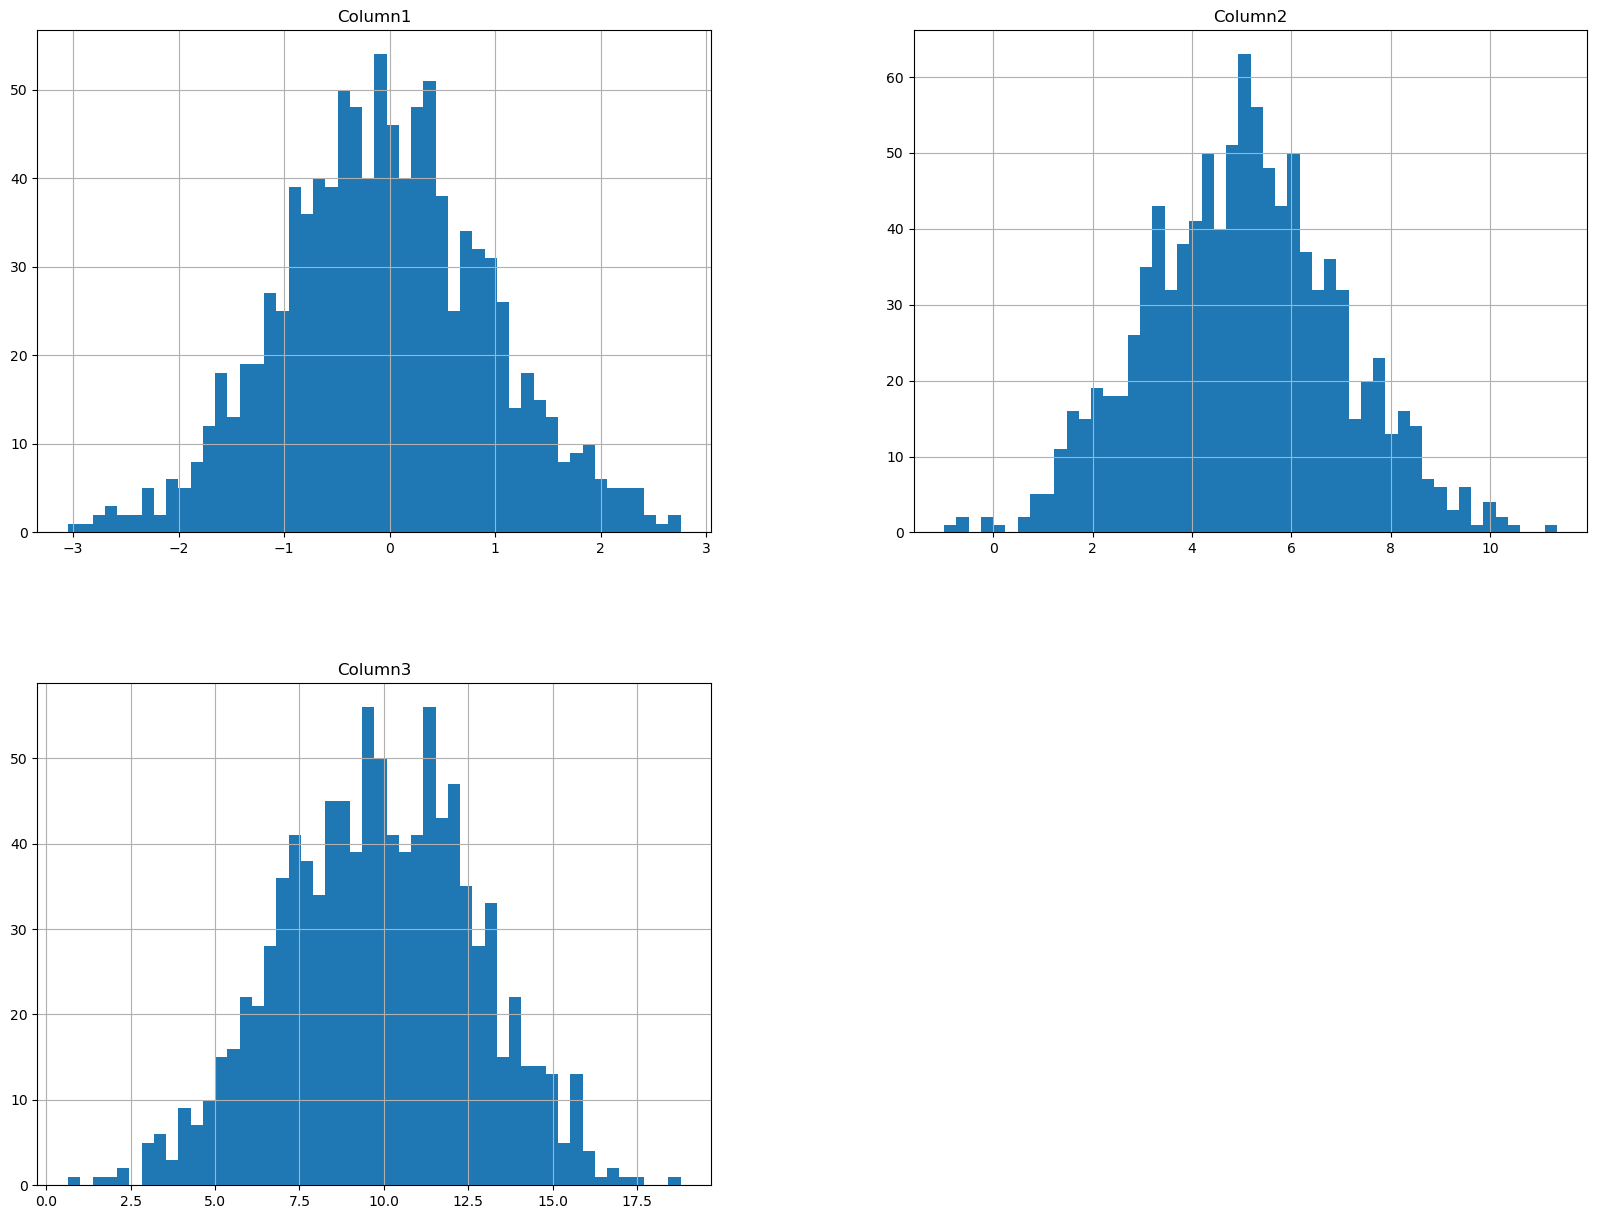

In [69]:

# Load the dataset
file_path = "Boston.csv"  # Update with the actual file path
data = pd.read_csv(file_path)


# Split the dataset into features (X) and target variable (y)
X = data.drop(columns='MEDV')  # Features
y = data['MEDV']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Initialize the models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor(),
    "CatBoost": cb.CatBoostRegressor(verbose=0)
}

# Evaluate each model
results = {}
for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[name] = {"Mean Squared Error": mse, "R-squared": r2}

# Display the results
for name, metrics in results.items():
    print(f"{name} - Mean Squared Error: {metrics['Mean Squared Error']:.4f}, R-squared: {metrics['R-squared']:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.796535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Data Preprocessing

In [71]:

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns='MEDV')  # Features
y = data['MEDV']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Exploratory data analsis

In [74]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

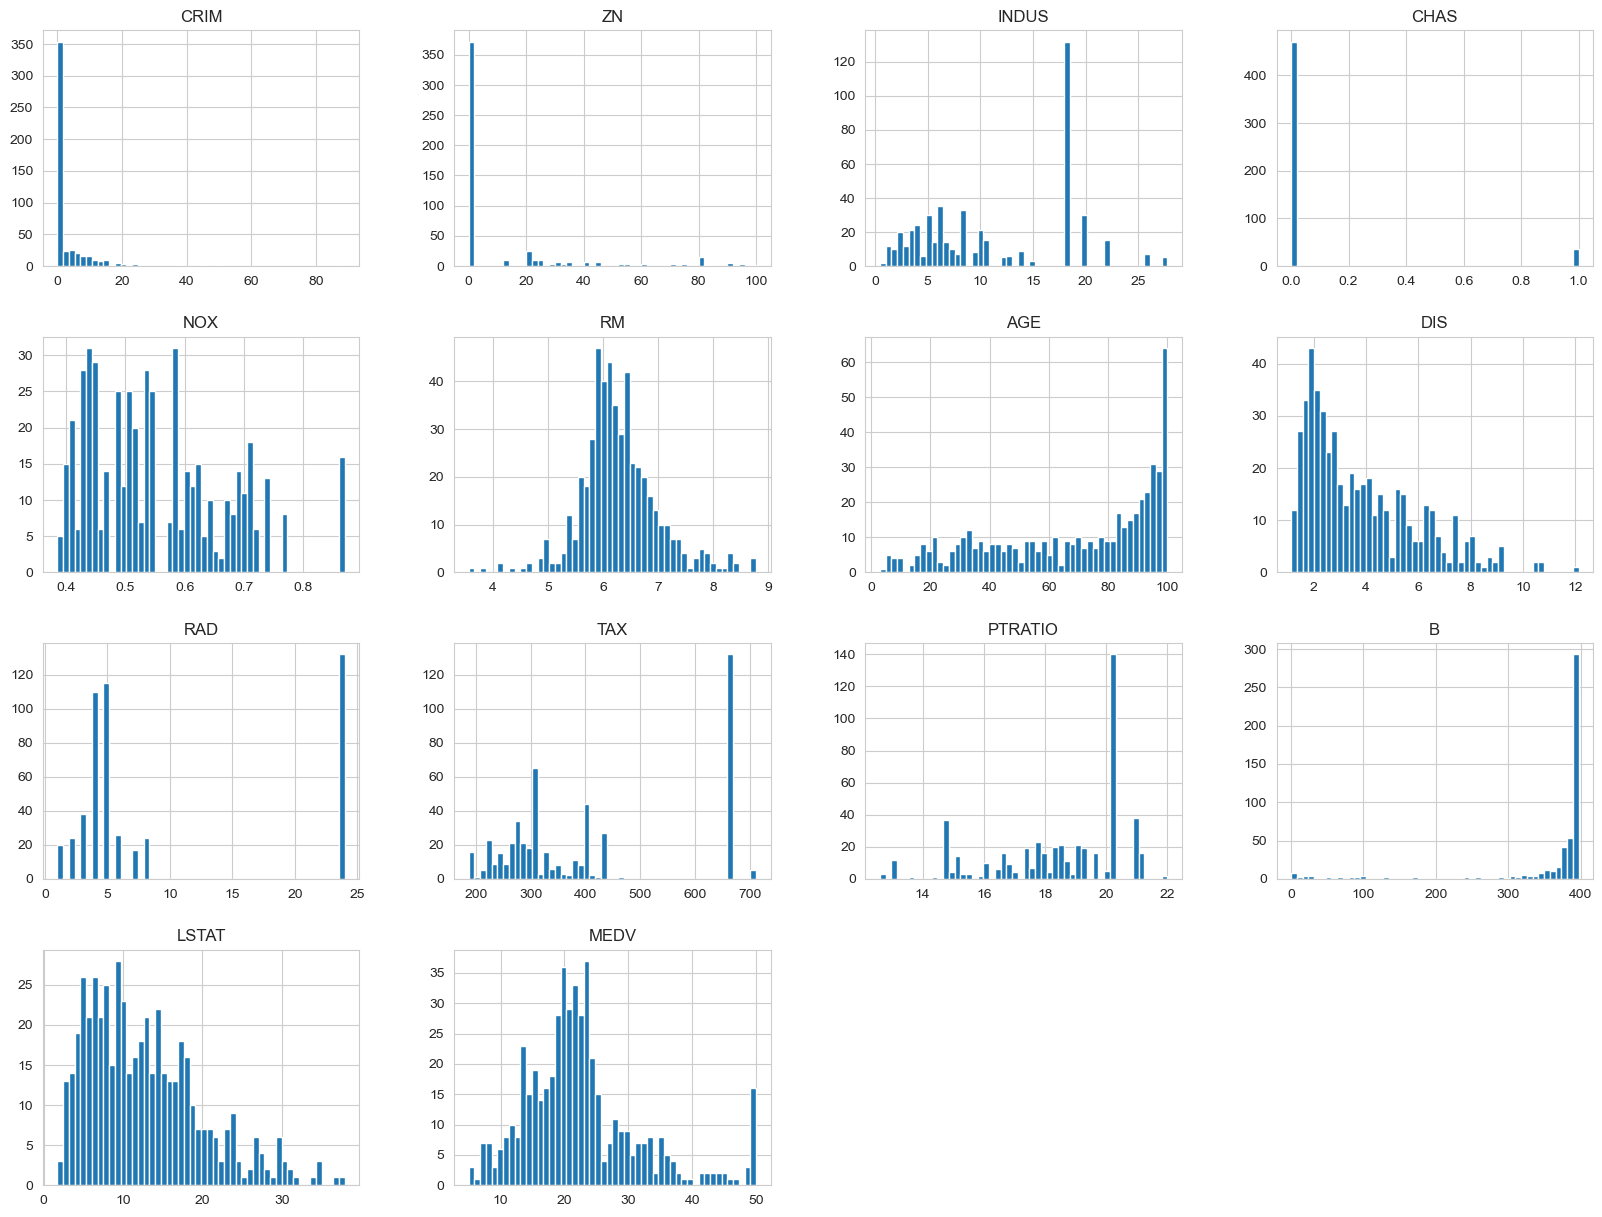

In [76]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

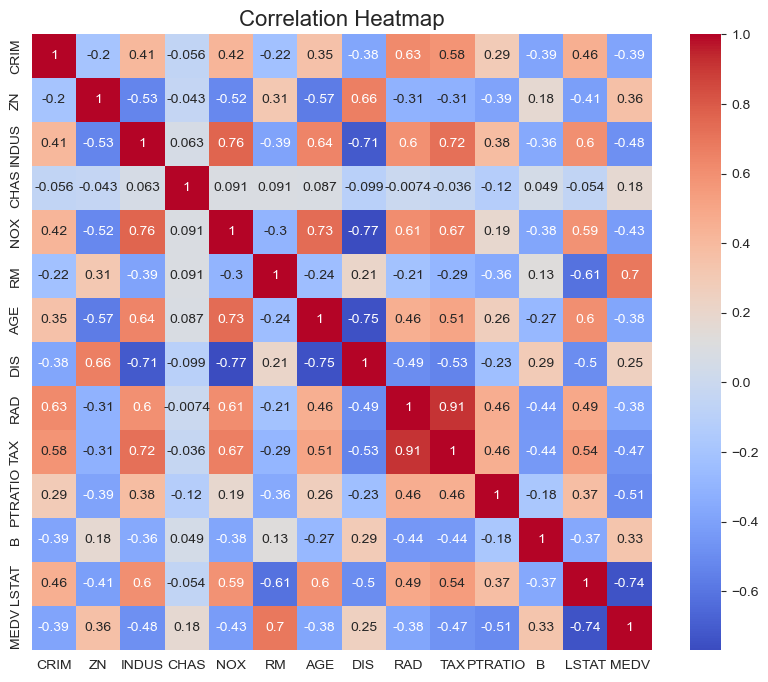

In [78]:
import seaborn as sns

corr_matrix = data.corr()

# Creating the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

c:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


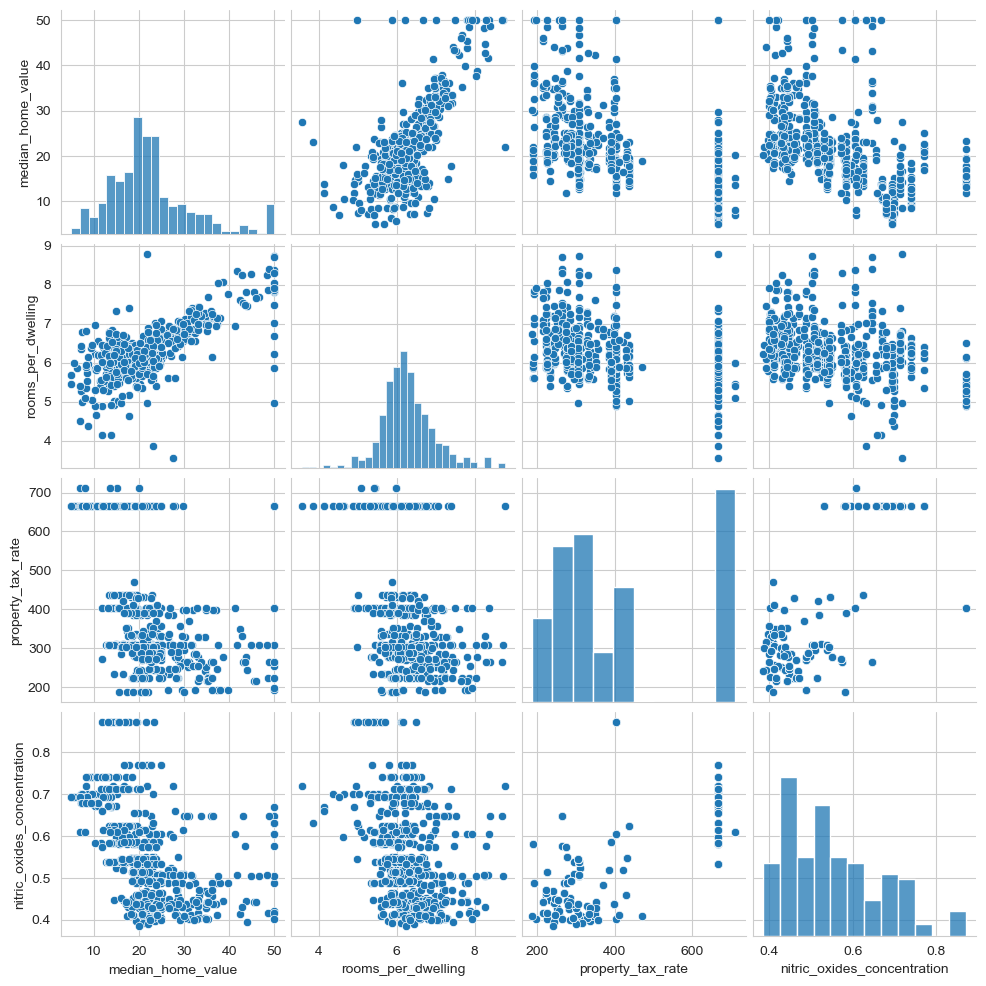

In [79]:
data.columns = ['crime_rate', 'residential_land_proportion', 'non_retail_acres', 
                'charles_river_dummy', 'nitric_oxides_concentration', 'rooms_per_dwelling', 
                'age_proportion', 'employment_access', 'highways_accessibility', 
                'property_tax_rate', 'pupil_teacher_ratio', 'black_proportion', 
                'lower_status_population', 'median_home_value']
columns = ['median_home_value', 'rooms_per_dwelling', 'property_tax_rate', 'nitric_oxides_concentration']

# creating the scatter plot matrix.
sns.pairplot(data[columns])
plt.show()

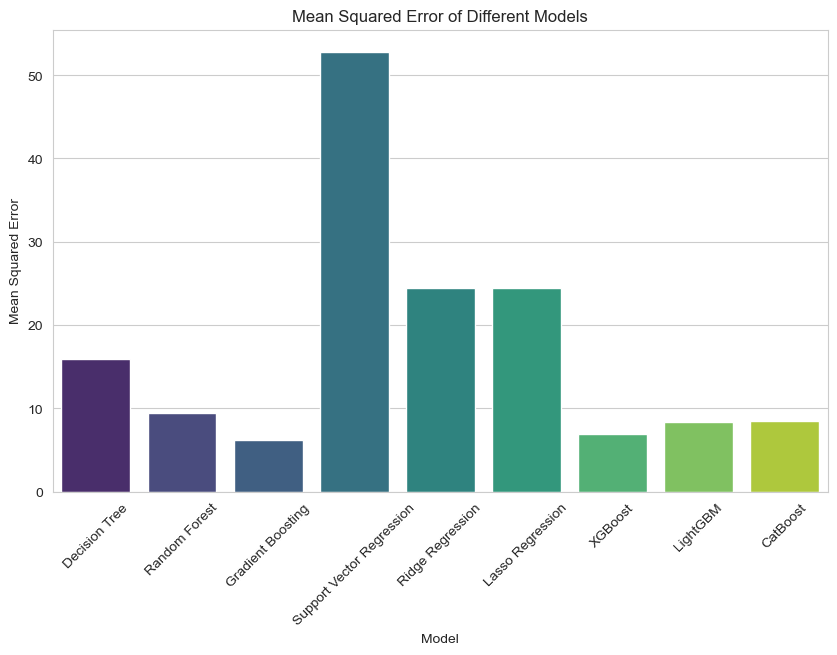

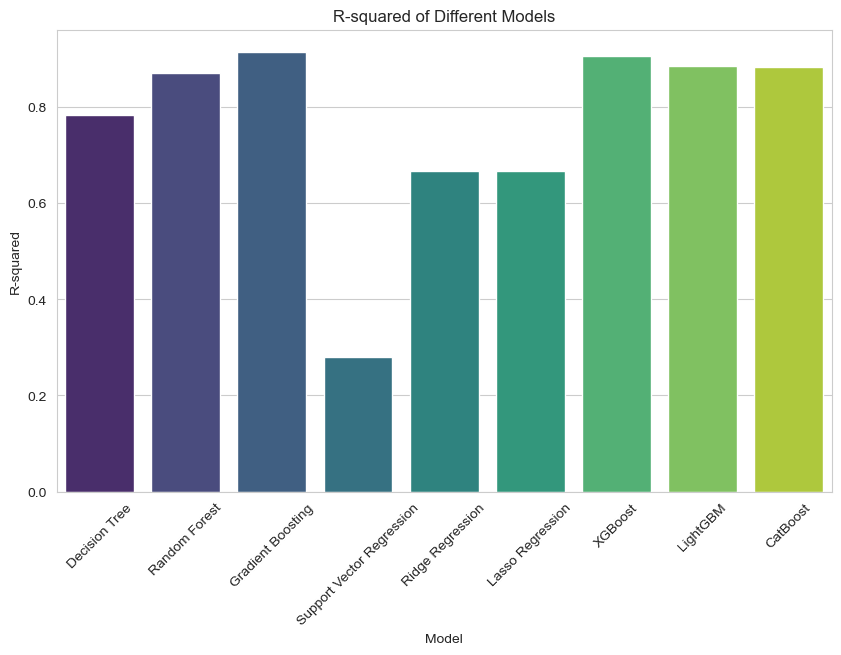

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for plotting
models = list(results.keys())
mse_values = [results[model]["Mean Squared Error"] for model in models]
r2_values = [results[model]["R-squared"] for model in models]

# Plot Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mse_values, palette='viridis')
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=r2_values, palette='viridis')
plt.title('R-squared of Different Models')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.show()

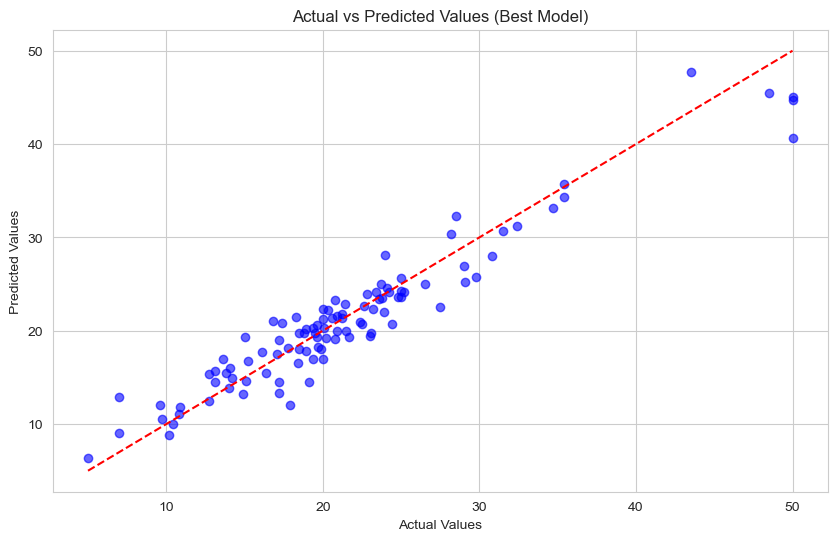

In [81]:
# Scatter Plot of Actual vs Predicted values for the best model
best_model = GradientBoostingRegressor()  # Replace with your best model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.title('Actual vs Predicted Values (Best Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.show()

In [82]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,RM,31.275250
1,LSTAT,27.907566
2,DIS,6.311056
3,NOX,5.920343
4,PTRATIO,5.307761
5,CRIM,4.725780
6,AGE,3.720727
7,B,3.404560
8,TAX,3.262407
9,INDUS,2.618691


In [84]:
cat= model

In [85]:
for key,value in cat.get_all_params().items():
 print('{}, {}'.format(key,value))

nan_mode, Min
eval_metric, RMSE
iterations, 1000
sampling_frequency, PerTree
leaf_estimation_method, Newton
random_score_type, NormalWithModelSizeDecrease
grow_policy, SymmetricTree
penalties_coefficient, 1
boosting_type, Plain
model_shrink_mode, Constant
feature_border_type, GreedyLogSum
bayesian_matrix_reg, 0.10000000149011612
eval_fraction, 0
force_unit_auto_pair_weights, False
l2_leaf_reg, 3
random_strength, 1
rsm, 1
boost_from_average, True
model_size_reg, 0.5
pool_metainfo_options, {'tags': {}}
subsample, 0.800000011920929
use_best_model, False
random_seed, 0
depth, 6
posterior_sampling, False
border_count, 254
classes_count, 0
auto_class_weights, None
sparse_features_conflict_fraction, 0
leaf_estimation_backtracking, AnyImprovement
best_model_min_trees, 1
model_shrink_rate, 0
min_data_in_leaf, 1
loss_function, RMSE
learning_rate, 0.03548000007867813
score_function, Cosine
task_type, CPU
leaf_estimation_iterations, 1
bootstrap_type, MVS
max_leaves, 64
